In [1]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import pandas as pd
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import auc, roc_auc_score
from sklearn.model_selection import StratifiedKFold



# Evaluate probability of unscored dataset

In [2]:
df = pd.read_csv("../data/pni_001_cleaned.csv")


In [3]:
X = df.drop(['ID','PNI'],axis =1)
y = df['PNI']
    
cv = StratifiedKFold(n_splits=5, random_state = 0, shuffle = True)

clf_cv = RandomForestClassifier(n_estimators=200,
    max_depth=25,
    min_samples_leaf=1,
    verbose=0)

# Use fold 1 model

for i, (train, test) in enumerate(cv.split(X, y)):
    if i == 1:
        clf_cv.fit(X.iloc[train], y.iloc[train])
        y_pred = clf_cv.predict_proba(X.iloc[test])[:,1]
        print(roc_auc_score(y.iloc[test],y_pred))

0.804160125588697


In [11]:
y.value_counts()

1.0    845
0.0    489
Name: PNI, dtype: int64

In [4]:
x_cols = list(X.columns)
x_cols_total = x_cols + ['ID']

In [5]:
df_unscored = pd.read_csv('data/unannotatedPNIprob_forPeter.csv')

In [6]:
df_unscored.rename({'X':'gene'},axis = 1,inplace = True)
df_unscored = df_unscored.set_index(keys = ['gene'])
df_unscored = df_unscored.transpose()
df_unscored= df_unscored.reset_index()
df_unscored.rename({'index':'ID'},axis = 1,inplace = True)

X_unscored = df_unscored[x_cols]

y_pred_proba = clf_cv.predict_proba(X_unscored)[:,1]

df_results_PNI = pd.DataFrame({
    'ID': df_unscored['ID'],
    'Probability': y_pred_proba
})

clf_total = RandomForestClassifier(n_estimators=200,
    max_depth=25,
    min_samples_leaf=1,
    verbose=0)

clf_total.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [7]:
y_pred_proba_total = clf_total.predict_proba(X_unscored)[:,1]

df_results_PNI_total = pd.DataFrame({
    'ID': df_unscored['ID'],
    'probability_cv_model':y_pred_proba,
    'probability_total_model': y_pred_proba_total
})

df_results_PNI_total.to_csv('data/unannotated_scored_pni001.csv',index= False)

df_results_PNI_total['diff'] = df_results_PNI_total['probability_cv_model'] - df_results_PNI_total['probability_total_model']

df_results_PNI_total['diff'].describe()

count    617.000000
mean       0.000352
std        0.048483
min       -0.149724
25%       -0.034076
50%        0.004611
75%        0.030484
max        0.159907
Name: diff, dtype: float64

Text(0.5, 1.0, 'PNI unscored probability histogram')

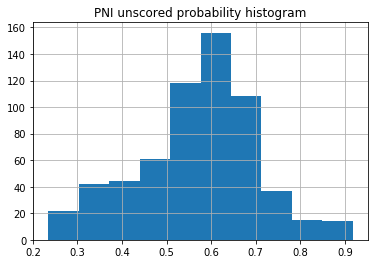

In [9]:
df_results_PNI_total['probability_total_model'].hist()
plt.title('PNI unscored probability histogram')

In [10]:
df_results_PNI_total['probability_total_model'].describe()

count    617.000000
mean       0.570384
std        0.133773
min        0.234986
25%        0.494901
50%        0.584972
75%        0.654231
max        0.917788
Name: probability_total_model, dtype: float64